# Divvy usage by time-of-day

**authors:** Peter Carbonetto, Gao Wang

Here we use the Divvy trip data to examine biking trends over the course of a typical day in Chicago.

We begin by loading a few packages, as well as some additional R functions implemented for this project. The `repr` package is used to adjust the dimensions of the figures in the Jupyter notebook.

In [1]:
library(repr)
library(data.table)
library(ggplot2)
source("../code/functions.R")

## Read the data

Following [our earlier steps](first-glance.html), we use function `read.divvy.data` to read the trip and station data from the CSV files.

In [2]:
divvy <- read.divvy.data()

Reading station data from ../data/Divvy_Stations_2016_Q4.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q1.csv.
Reading trip data from ../data/Divvy_Trips_2016_04.csv.
Reading trip data from ../data/Divvy_Trips_2016_05.csv.
Reading trip data from ../data/Divvy_Trips_2016_06.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q3.csv.
Reading trip data from ../data/Divvy_Trips_2016_Q4.csv.
Preparing Divvy data for analysis in R.
Converting dates and times.


To make it easier to compile statistics by time of day, we convert the "start hour" column to a factor.

In [3]:
divvy$trips <- transform(divvy$trips,start.hour = factor(start.hour,0:23))

## Count departures by time-of-day

Now that `start.hour` is a factor, it is easy to create a bar chart showing the total number of departures at each hour. Unsurprisingly, we see very little biking activity at night. Further, the two peaks ("modes") in the bar chart nicely recapitulate the morning and afternoon rush hours.

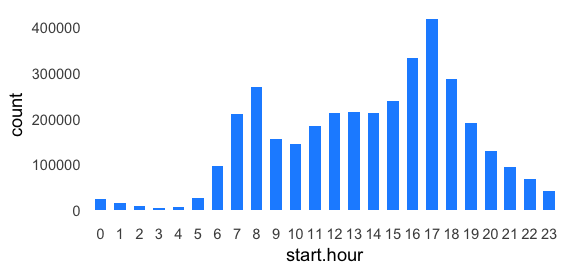

In [4]:
options(repr.plot.width = 4.75, repr.plot.height = 2.25)
ggplot(divvy$trips,aes(start.hour)) +
  geom_bar(fill = "dodgerblue",width = 0.6) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

However, this bar chart is a bit muddled because it is counting trips during the week and on the weekends. Consider that the bin count $x[h]$ for hour $h$ in the histogram above is a sum of the counts for each day of the week:

$$
\begin{align}
x[h]
& = \sum_{i\;\in\;\mathsf{DaysOfTheWeek}} x_i[h] \\
& = x_{\mathsf{Mon}}[h] + x_{\mathsf{Tue}}[h] + x_{\mathsf{Wed}}[h] +
x_{\mathsf{Thu}}[h] + x_{\mathsf{Fri}}[h] + x_{\mathsf{Sat}}[h] +
x_{\mathsf{Sun}}[h]
\end{align}
$$

*Note:* The math above is embedded in the webpage using [MathJax](https://github.com/mathjax/MathJax). See [here](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) for an excellent reference on MathJax.

Once we plot the counts separately for each the day of the week, the
rush-hour trends become more obvious. (Also notice that the rush-hour
weeks disappear on Saturday and Sunday.)

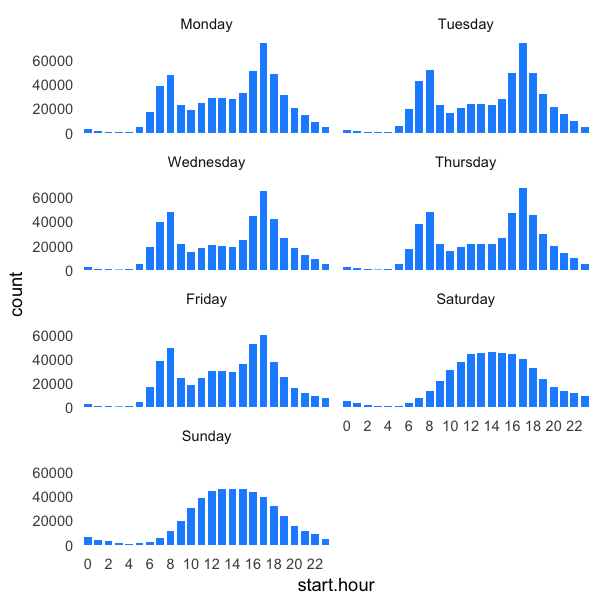

In [5]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(divvy$trips,aes(start.hour)) +
  geom_bar(fill = "dodgerblue",width = 0.75) +
  facet_wrap(~start.day,ncol = 2) +
  scale_x_discrete(breaks = seq(0,24,2)) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

## Time-of-day trends at University of Chicago

The commuting trends are different at the University of Chicago Divvy station---there isn't much of a morning rush hour. This may be because students and staff don't regularly use the Divvy bikes for commuting.

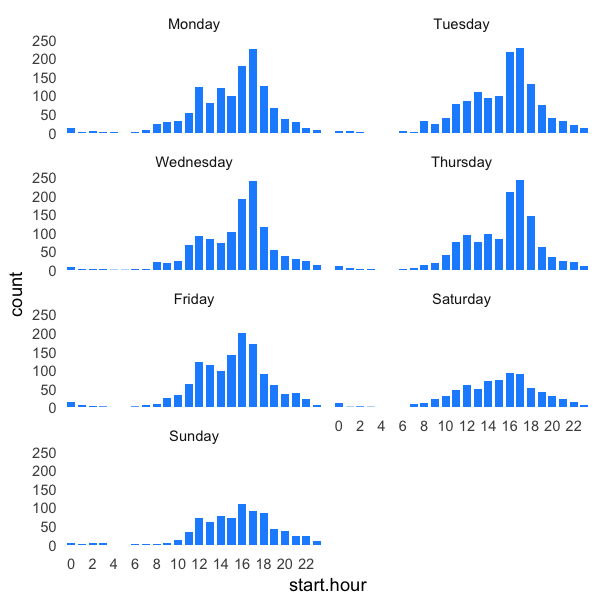

In [6]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(subset(divvy$trips,from_station_name == "University Ave & 57th St"),
       aes(start.hour)) +
  geom_bar(fill = "dodgerblue",width = 0.75) +
  facet_wrap(~start.day,ncol = 2) +
  scale_x_discrete(breaks = seq(0,24,2)) +
  theme_minimal() +
  theme(panel.grid.major = element_blank(),
        panel.grid.minor = element_blank())

## Session information

This is the version of Jupyter used to generate these results.

In [7]:
system("jupyter --version",intern = TRUE)

[1] "4.3.0"

This is the version of R and the packages that were used to generate these results.

In [8]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-apple-darwin13.4.0 (64-bit)
Running under: macOS Sierra 10.12.5

locale:
[1] en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/en_US.UTF-8

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggplot2_2.2.1     data.table_1.10.4 repr_0.12.0      

loaded via a namespace (and not attached):
 [1] Rcpp_0.12.11     assertthat_0.2.0 digest_0.6.12    crayon_1.3.2    
 [5] IRdisplay_0.4.4  plyr_1.8.4       grid_3.3.2       R6_2.2.0        
 [9] jsonlite_1.5     gtable_0.2.0     magrittr_1.5     scales_0.4.1    
[13] evaluate_0.10.1  stringi_1.1.2    lazyeval_0.2.0   uuid_0.1-2      
[17] IRkernel_0.7     labeling_0.3     tools_3.3.2      stringr_1.2.0   
[21] munsell_0.4.3    colorspace_1.3-2 pbdZMQ_0.2-5     tibble_1.2      